# 랜덤 포레스트 (Random Forest)

- 복원추출을 통해 샘플데이터를 생성(bootstrapping) 하여 같은 알고리즘을 적용한 후, 소프트 보팅을 통해 결과값 도출

![random_forest](./random_forest.png)

# 파이썬 방식 - XGBoost

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
datasets=load_breast_cancer()

cancer_df=pd.DataFrame(datasets.data, columns=datasets.feature_names)
cancer_df['cancer']=datasets.target

cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
X=cancer_df.drop('cancer', axis=1)
y=cancer_df['cancer']

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [6]:
print(datasets.target_names)
print(cancer_df['cancer'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: cancer, dtype: int64


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [20]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [21]:
# DMatrix 형태로 변환

dtrain=xgb.DMatrix(data=x_train, label=y_train)
dtest=xgb.DMatrix(data=x_test, label=y_test)

In [22]:
params={'max_depth':3,
       'eta':0.1,
       'objective':'binary:logistic',
       'eval_metric':'logloss',
       'early_stoppings':100}

num_rounds=400

In [24]:
wlist=[(dtrain,'train'), (dtest,'eval')]

xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[01:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0

[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:

[330]	train-logloss:0.00533	eval-logloss:0.08587
[331]	train-logloss:0.00532	eval-logloss:0.08589
[332]	train-logloss:0.00532	eval-logloss:0.08592
[333]	train-logloss:0.00531	eval-logloss:0.08584
[334]	train-logloss:0.00531	eval-logloss:0.08574
[335]	train-logloss:0.00530	eval-logloss:0.08582
[336]	train-logloss:0.00529	eval-logloss:0.08589
[337]	train-logloss:0.00529	eval-logloss:0.08594
[338]	train-logloss:0.00528	eval-logloss:0.08583
[339]	train-logloss:0.00528	eval-logloss:0.08591
[340]	train-logloss:0.00527	eval-logloss:0.08583
[341]	train-logloss:0.00526	eval-logloss:0.08573
[342]	train-logloss:0.00526	eval-logloss:0.08568
[343]	train-logloss:0.00525	eval-logloss:0.08572
[344]	train-logloss:0.00525	eval-logloss:0.08580
[345]	train-logloss:0.00524	eval-logloss:0.08582
[346]	train-logloss:0.00524	eval-logloss:0.08571
[347]	train-logloss:0.00523	eval-logloss:0.08579
[348]	train-logloss:0.00523	eval-logloss:0.08583
[349]	train-logloss:0.00522	eval-logloss:0.08573
[350]	train-logloss:

In [25]:
pred_probs=xgb_model.predict(dtest)

preds=[1 if x > 0.5 else 0 for x in pred_probs]
print(preds[:10])

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [27]:
from sklearn.metrics import f1_score

print(f1_score(y_test, preds))

0.9806451612903225


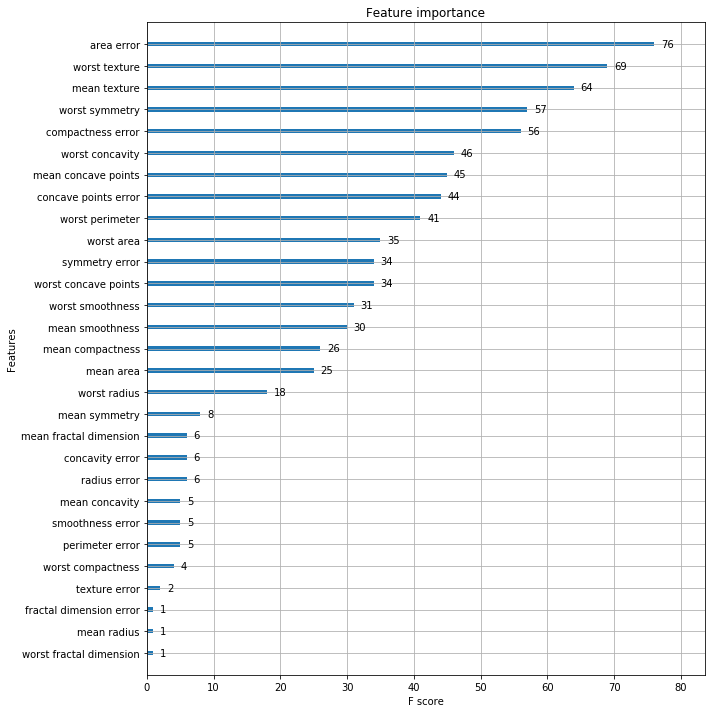

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

# 사이킷런 방식 - XGBoost

In [32]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3) # 분류기 400, 학습률 0.1, 깊이 3
xgb_wrapper.fit(x_train, y_train)

w_pred=xgb_wrapper.predict(x_test)

print('F1 SCORE : {0:.4f}'.format(f1_score(y_test, w_pred)))

[01:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 SCORE : 0.9806


In [34]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [35]:
dataset=load_breast_cancer()

cancer_df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
cancer_df['cancer']=dataset.target

cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [36]:
X=cancer_df.drop('cancer', axis=1)
y=cancer_df['cancer']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
lgbm_wrapper=LGBMClassifier(n_estimators=400)

In [39]:
evals=[(x_test, y_test)]

lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss', # 분류모델일때 logloss 를 주로 사용
                eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.602575
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.536123
[3]	valid_0's binary_logloss: 0.482224
[4]	valid_0's binary_logloss: 0.439121
[5]	valid_0's binary_logloss: 0.399484
[6]	valid_0's binary_logloss: 0.360741
[7]	valid_0's binary_logloss: 0.329635
[8]	valid_0's binary_logloss: 0.300259
[9]	valid_0's binary_logloss: 0.279599
[10]	valid_0's binary_logloss: 0.259173
[11]	valid_0's binary_logloss: 0.239127
[12]	valid_0's binary_logloss: 0.222309
[13]	valid_0's binary_logloss: 0.209351
[14]	valid_0's binary_logloss: 0.194316
[15]	valid_0's binary_logloss: 0.185282
[16]	valid_0's binary_logloss: 0.173675
[17]	valid_0's binary_logloss: 0.165308
[18]	valid_0's binary_logloss: 0.155769
[19]	valid_0's binary_logloss: 0.14865
[20]	valid_0's binary_logloss: 0.140995
[21]	valid_0's binary_logloss: 0.134334
[22]	valid_0's binary_logloss: 0.126574
[23]	valid_0's binary_logloss: 0.119264
[24]	valid_0's binary_loglos

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
preds=lgbm_wrapper.predict(x_test)

In [41]:
print('F1 Score : {0:.4f}'.format(f1_score(y_test, preds)))

F1 Score : 0.9706


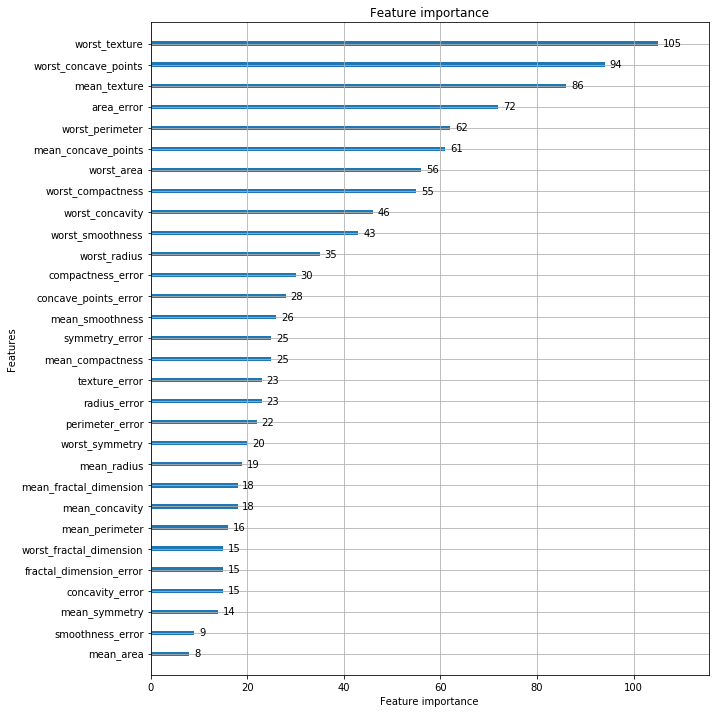

In [42]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)